In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import random

tf.enable_eager_execution()

In [67]:
def load_image(path):
    # Read raw image (string of pixel values)
    image = tf.read_file(path)
    
    # Decode the raw image into pixel array
#     image = tf.image.decode_image(image)    # This is supposed to do the same thing as below, but there seems to be a bug...
    image = tf.cond(tf.image.is_jpeg(image),
      lambda: tf.image.decode_jpeg(image),
      lambda: tf.image.decode_png(image))
    
#     image = tf.image.decode_image(image)   # Decode the raw image into pixel array
    image = tf.cast(image, tf.float32)     # Make sure the pixel values are in floating point numbers, NOT INTEGERS
    image = tf.image.resize(image, [384, 384])
    image /= 255.0
    
    return image

def linear_transform(n=1, scale=(1,1), angle=0, shear=(0,0), translate=(0,0)):
    M = np.zeros((3,3,1))
    M[:,0,:] = translate[:,0]
    M = [[0,0,translate(0)], [0,0,translate(1)], [0,0,1]]
    M *= [[cos(angle), -sin(angle), 0],[sin(angle), cos(angle), 0],[0,0,1]]
    M *= [[scale[0], 0, 0],[0, scale[0], 0],[0,0,1]]
    M *= [[1, shear[0], 0],[shear[1], 1, 0],[0,0,1]]
    return M

# tf.contrib.image.transform(image)
    

In [60]:
n=10
translate = np.array([np.arange(n), np.arange(n,2*n)])
T = np.zeros((n,3,3))
T[:,0,0] = 1
T[:,1,1] = 1
T[:,2,2] = 1
T[:,0,2] = translate[0,:]
T[:,1,2] = translate[1,:]

angle = np.linspace(-np.pi/6, np.pi/6, num=n)
R = np.zeros((n,3,3))
R[:,2,2] = 1;
R[:,0,0] = np.cos(angle)
R[:,1,1] = np.cos(angle)
R[:,0,1] = -np.sin(angle)
R[:,1,0] = np.sin(angle)

M = np.matmul(T, R)

array([[[ 0.8660254 ,  0.5       ,  0.        ],
        [-0.5       ,  0.8660254 , 10.        ],
        [ 0.        ,  0.        ,  1.        ]],

       [[ 0.91821611,  0.39607977,  1.        ],
        [-0.39607977,  0.91821611, 11.        ],
        [ 0.        ,  0.        ,  1.        ]],

       [[ 0.95798951,  0.28680323,  2.        ],
        [-0.28680323,  0.95798951, 12.        ],
        [ 0.        ,  0.        ,  1.        ]],

       [[ 0.98480775,  0.17364818,  3.        ],
        [-0.17364818,  0.98480775, 13.        ],
        [ 0.        ,  0.        ,  1.        ]],

       [[ 0.99830816,  0.05814483,  4.        ],
        [-0.05814483,  0.99830816, 14.        ],
        [ 0.        ,  0.        ,  1.        ]],

       [[ 0.99830816, -0.05814483,  5.        ],
        [ 0.05814483,  0.99830816, 15.        ],
        [ 0.        ,  0.        ,  1.        ]],

       [[ 0.98480775, -0.17364818,  6.        ],
        [ 0.17364818,  0.98480775, 16.        ],
        

In [62]:
R[1,:,:]

array([[ 0.91821611,  0.39607977,  0.        ],
       [-0.39607977,  0.91821611,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

(384, 384, 1)


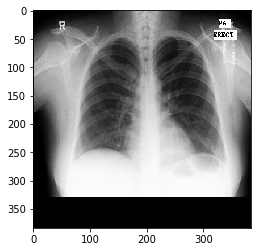

In [3]:
image = load_image('./data/montgomery/images/MCUCXR_0001_0.png')
print(image.shape)
plt.imshow(np.squeeze(image), cmap='gray')

In [4]:
import random
montgomery_root = pathlib.Path('./data/montgomery')

# read image paths using glob and convert them into string format
montgomery_image_paths = [str(path) for path in list(montgomery_root.glob('images/*.png'))]
montgomery_mask_left_paths = [str(path) for path in list(montgomery_root.glob('masks/left/*.png'))]
montgomery_mask_right_paths = [str(path) for path in list(montgomery_root.glob('masks/right/*.png'))]

# shuffle them in a random order
temp = list(zip(montgomery_image_paths, montgomery_mask_left_paths, montgomery_mask_right_paths)) # zip the three paths to make sure they are shuffled together
random.shuffle(temp) # shuffle
montgomery_image_paths, montgomery_mask_left_paths, montgomery_mask_right_paths = zip(*temp) # unzip them
montgomery_image_paths = list(montgomery_image_paths)           # unzipping converts the lists to tuples for some reason...
montgomery_mask_left_paths = list(montgomery_mask_left_paths)   # we are explicitly converting them back to lists
montgomery_mask_right_paths = list(montgomery_mask_right_paths) #

In [68]:
montgomery_image_path_ds = tf.data.Dataset.from_tensor_slices(montgomery_image_paths)
montgomery_mask_left_path_ds = tf.data.Dataset.from_tensor_slices(montgomery_mask_left_paths)
montgomery_mask_right_path_ds = tf.data.Dataset.from_tensor_slices(montgomery_mask_right_paths)

print('shape: ', repr(montgomery_image_path_ds.output_shapes))
print('type: ', montgomery_image_path_ds.output_types)
print()
print(montgomery_image_path_ds)
print()

montgomery_image_ds = montgomery_image_path_ds.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)

shape:  TensorShape([])
type:  <dtype: 'string'>

<DatasetV1Adapter shapes: (), types: tf.string>



In [69]:
import IPython.display as display
for n in range(3):
  image_path = random.choice(montgomery_image_paths)
  image = load_image(image_path)
  display.display(display.Image(image))

FileNotFoundError: No such file or directory: 'tf.Tensor(
[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]], shape=(384, 384, 1), dtype=float32)'

FileNotFoundError: No such file or directory: 'tf.Tensor(
[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]], shape=(384, 384, 1), dtype=float32)'

<IPython.core.display.Image object>

FileNotFoundError: No such file or directory: 'tf.Tensor(
[[[0.        ]
  [0.        ]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 ...

 [[0.        ]
  [0.        ]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.00392157]
  [0.        ]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]], shape=(384, 384, 1), dtype=float32)'

FileNotFoundError: No such file or directory: 'tf.Tensor(
[[[0.        ]
  [0.        ]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 ...

 [[0.        ]
  [0.        ]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.00392157]
  [0.        ]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]], shape=(384, 384, 1), dtype=float32)'

<IPython.core.display.Image object>

FileNotFoundError: No such file or directory: 'tf.Tensor(
[[[0.00392157]
  [0.00392157]
  [0.00392157]
  ...
  [0.        ]
  [0.        ]
  [0.00392157]]

 [[0.00392157]
  [0.00392157]
  [0.00392157]
  ...
  [0.        ]
  [0.        ]
  [0.00392157]]

 [[0.00392157]
  [0.00392157]
  [0.00392157]
  ...
  [0.        ]
  [0.        ]
  [0.00392157]]

 ...

 [[0.        ]
  [0.        ]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]], shape=(384, 384, 1), dtype=float32)'

FileNotFoundError: No such file or directory: 'tf.Tensor(
[[[0.00392157]
  [0.00392157]
  [0.00392157]
  ...
  [0.        ]
  [0.        ]
  [0.00392157]]

 [[0.00392157]
  [0.00392157]
  [0.00392157]
  ...
  [0.        ]
  [0.        ]
  [0.00392157]]

 [[0.00392157]
  [0.00392157]
  [0.00392157]
  ...
  [0.        ]
  [0.        ]
  [0.00392157]]

 ...

 [[0.        ]
  [0.        ]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]], shape=(384, 384, 1), dtype=float32)'

<IPython.core.display.Image object>

In [48]:
for path in montgomery_image_path_ds.take(15):
    print(path)

tf.Tensor(b'data\\montgomery\\images\\MCUCXR_0162_1.png', shape=(), dtype=string)
tf.Tensor(b'data\\montgomery\\images\\MCUCXR_0058_0.png', shape=(), dtype=string)
tf.Tensor(b'data\\montgomery\\images\\MCUCXR_0390_1.png', shape=(), dtype=string)
tf.Tensor(b'data\\montgomery\\images\\MCUCXR_0062_0.png', shape=(), dtype=string)
tf.Tensor(b'data\\montgomery\\images\\MCUCXR_0068_0.png', shape=(), dtype=string)
tf.Tensor(b'data\\montgomery\\images\\MCUCXR_0017_0.png', shape=(), dtype=string)
tf.Tensor(b'data\\montgomery\\images\\MCUCXR_0182_1.png', shape=(), dtype=string)
tf.Tensor(b'data\\montgomery\\images\\MCUCXR_0024_0.png', shape=(), dtype=string)
tf.Tensor(b'data\\montgomery\\images\\MCUCXR_0101_0.png', shape=(), dtype=string)
tf.Tensor(b'data\\montgomery\\images\\MCUCXR_0196_1.png', shape=(), dtype=string)
tf.Tensor(b'data\\montgomery\\images\\MCUCXR_0188_1.png', shape=(), dtype=string)
tf.Tensor(b'data\\montgomery\\images\\MCUCXR_0264_1.png', shape=(), dtype=string)
tf.Tensor(b'data

In [13]:
import pathlib
data_root_orig = tf.keras.utils.get_file('flower_photos',
                                         'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                         untar=True)
data_root = pathlib.Path(data_root_orig)
print(data_root)

228818944/228813984 [==============================] - 3s 0us/step
C:\Users\sbaek.IOWA\.keras\datasets\flower_photos


In [14]:
for item in data_root.iterdir():
  print(item)

C:\Users\sbaek.IOWA\.keras\datasets\flower_photos\daisy
C:\Users\sbaek.IOWA\.keras\datasets\flower_photos\dandelion
C:\Users\sbaek.IOWA\.keras\datasets\flower_photos\LICENSE.txt
C:\Users\sbaek.IOWA\.keras\datasets\flower_photos\roses
C:\Users\sbaek.IOWA\.keras\datasets\flower_photos\sunflowers
C:\Users\sbaek.IOWA\.keras\datasets\flower_photos\tulips


In [15]:
import random
all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
random.shuffle(all_image_paths)

image_count = len(all_image_paths)
image_count

3670

In [16]:
all_image_paths[:10]

['C:\\Users\\sbaek.IOWA\\.keras\\datasets\\flower_photos\\roses\\12045735155_42547ce4e9_n.jpg',
 'C:\\Users\\sbaek.IOWA\\.keras\\datasets\\flower_photos\\daisy\\19280272025_57de24e940_m.jpg',
 'C:\\Users\\sbaek.IOWA\\.keras\\datasets\\flower_photos\\dandelion\\7165651120_2279ebf6d1.jpg',
 'C:\\Users\\sbaek.IOWA\\.keras\\datasets\\flower_photos\\sunflowers\\4932735362_6e1017140f.jpg',
 'C:\\Users\\sbaek.IOWA\\.keras\\datasets\\flower_photos\\daisy\\18635898912_eb8e058ef0.jpg',
 'C:\\Users\\sbaek.IOWA\\.keras\\datasets\\flower_photos\\dandelion\\126012913_edf771c564_n.jpg',
 'C:\\Users\\sbaek.IOWA\\.keras\\datasets\\flower_photos\\sunflowers\\19595718862_c68896370c_m.jpg',
 'C:\\Users\\sbaek.IOWA\\.keras\\datasets\\flower_photos\\tulips\\3476945045_97ff41e8ec_n.jpg',
 'C:\\Users\\sbaek.IOWA\\.keras\\datasets\\flower_photos\\roses\\13235124703_a7e1266e44.jpg',
 'C:\\Users\\sbaek.IOWA\\.keras\\datasets\\flower_photos\\tulips\\6936168062_a31c28b77c_m.jpg']

In [17]:
import os
attributions = (data_root/"LICENSE.txt").open(encoding='utf-8').readlines()[4:]
attributions = [line.split(' CC-BY') for line in attributions]
attributions = dict(attributions)

In [18]:
import IPython.display as display

def caption_image(image_path):
    image_rel = pathlib.Path(image_path).relative_to(data_root)
    return "Image (CC BY 2.0) " + ' - '.join(attributions[str(image_rel)].split(' - ')[:-1])

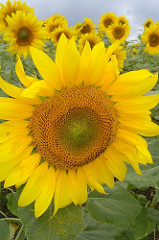

KeyError: 'sunflowers\\184682920_97ae41ce60_m.jpg'

In [19]:
for n in range(3):
  image_path = random.choice(all_image_paths)
  display.display(display.Image(image_path))
  print(caption_image(image_path))
  print()

In [21]:
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
label_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [22]:
label_to_index = dict((name, index) for index,name in enumerate(label_names))
label_to_index

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [23]:
all_image_labels = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image_paths]

print("First 10 labels indices: ", all_image_labels[:10])

First 10 labels indices:  [2, 0, 1, 3, 0, 1, 3, 4, 2, 4]


In [24]:
img_path = all_image_paths[0]
img_path

'C:\\Users\\sbaek.IOWA\\.keras\\datasets\\flower_photos\\roses\\12045735155_42547ce4e9_n.jpg'

In [25]:
img_raw = tf.read_file(img_path)
print(repr(img_raw)[:100]+"...")

<tf.Tensor: id=303, shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00...


In [26]:
def preprocess_image(image):
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, [192, 192])
  image /= 255.0  # normalize to [0,1] range

  return image

In [27]:
def load_and_preprocess_image(path):
  image = tf.read_file(path)
  return preprocess_image(image)

KeyError: 'roses\\12045735155_42547ce4e9_n.jpg'

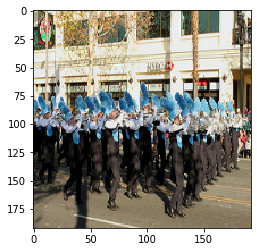

In [28]:
import matplotlib.pyplot as plt

img_path = all_image_paths[0]
label = all_image_labels[0]

plt.imshow(load_and_preprocess_image(img_path))
plt.grid(False)
plt.xlabel(caption_image(img_path).encode('utf-8'))
plt.title(label_names[label].title())
print()

In [29]:
path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)
print('shape: ', repr(path_ds.output_shapes))
print('type: ', path_ds.output_types)
print()
print(path_ds)

W0719 10:17:39.620589  8884 deprecation.py:323] From <ipython-input-29-b78df0ce1e42>:2: DatasetV1.output_shapes (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.
W0719 10:17:39.621589  8884 deprecation.py:323] From <ipython-input-29-b78df0ce1e42>:3: DatasetV1.output_types (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.data.get_output_types(dataset)`.


shape:  TensorShape([])
type:  <dtype: 'string'>

<DatasetV1Adapter shapes: (), types: tf.string>


In [34]:
image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)

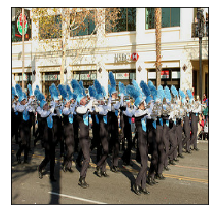

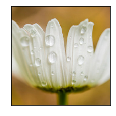

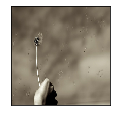

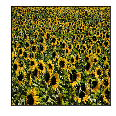

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
for n,image in enumerate(image_ds.take(4)):
  plt.subplot(2,2,n+1)
  plt.imshow(image)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.show()

In [ ]:
import pathlib
data_root = pathlib.Path('./data')
print(data_root)

In [ ]:
for item in data_root.iterdir():
    print(item)

In [ ]:
import random
all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
random.shuffle(all_image_paths)

image_count = len(all_image_paths)
image_count

In [ ]:
data_root.glob('*/*')

In [ ]:
path = './data/montgomery/images/MCUCXR_0001_0.png'
image = tf.io.read_file(path)


In [ ]:
img_tensor = tf.image.decode_image(image)
print(img_tensor.shape)

In [ ]:
np.max(img_tensor)